![](https://png.pngtree.com/thumb_back/fw800/background/20240324/pngtree-cricket-background-logo-image_15687146.jpg)

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [2]:
df=pd.read_csv('Cricket.csv',encoding ="latin")

df.head(2)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


In [4]:
df[["Start","End"]]=df["Span"].str.split("-",expand=True)


In [5]:
df[["Start","End"]]=df[["Start","End"]].astype("int")
df["Exp"]=df["End"]-df["Start"]
df.drop(columns=['Span','Start','End'],inplace=True)
df.head(2)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15


In [6]:
df["HS"]=df["HS"].str.replace("*","")
df["HS"]=df["HS"].astype("int")
df.head(1)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23


In [7]:
df.duplicated().sum()

0

### Checking for outliers in each columns

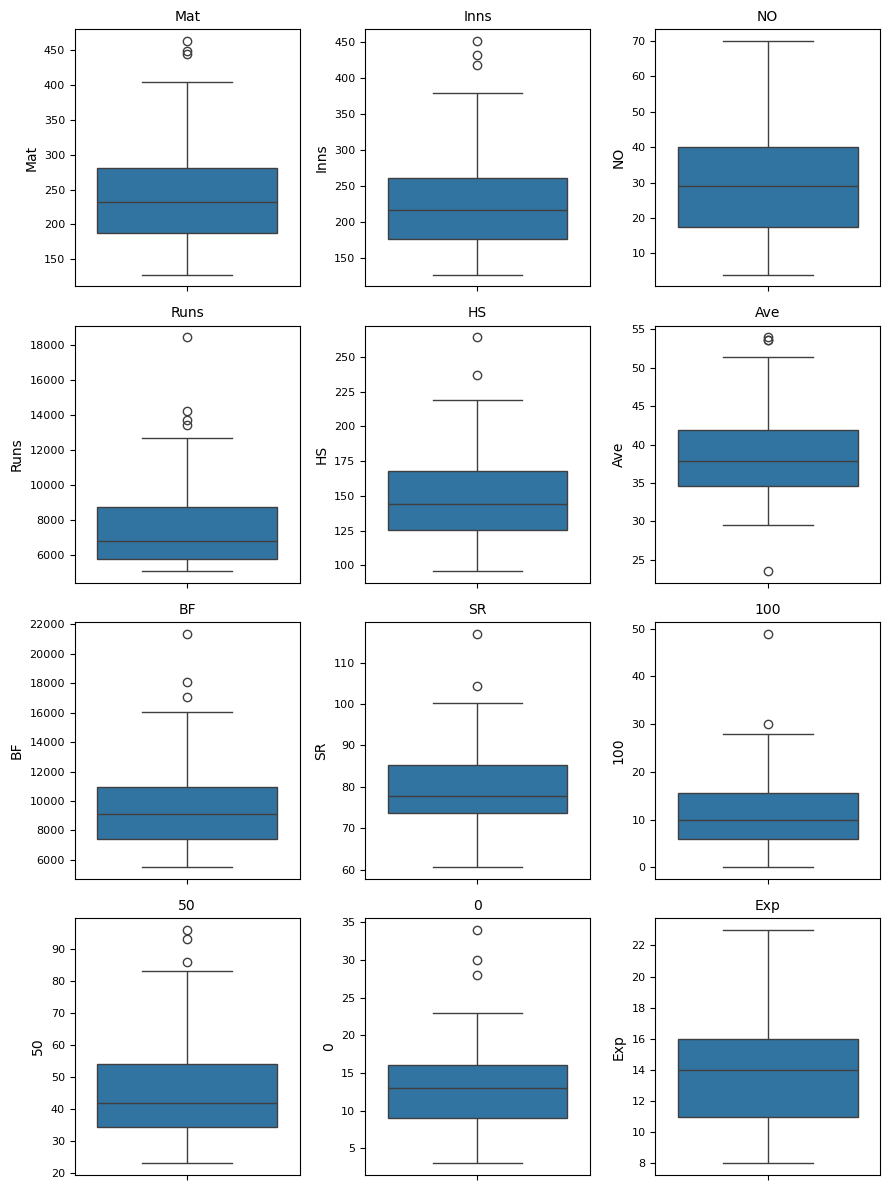

In [8]:
plt.rc('font', size=10)  
plt.rc('axes', titlesize=10) 
plt.rc('axes', labelsize=10) 
plt.rc('xtick', labelsize=8)  
plt.rc('ytick', labelsize=8)  


numeric_cols = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_cols)


ncols = 3 
nrows = (num_cols + ncols - 1) // ncols  


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3 * ncols, 3 * nrows))
axes = axes.flatten() 


for ax, col in zip(axes, numeric_cols):
    sns.boxplot(y=df[col], ax=ax)  
    ax.set_title(col)

plt.tight_layout() 
plt.show()

In [9]:
df.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Exp'],
      dtype='object')

#### Removing outliers

In [10]:
#removing outliers

outlier_cols=['Mat','Inns','Runs','HS', 'Ave','BF', 'SR','100','50','0' ]

for col in outlier_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    
    iqr=q3-q1
    lower_limit=q1-(iqr*1.5)
    upper_limit=q3+(iqr*1.5)
    
    df=df[(df[col]>=lower_limit)&(df[col]<=upper_limit)]

In [11]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141,41.71,12942,75.10,15,64,15,12
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19


#### Rechecking now outliers

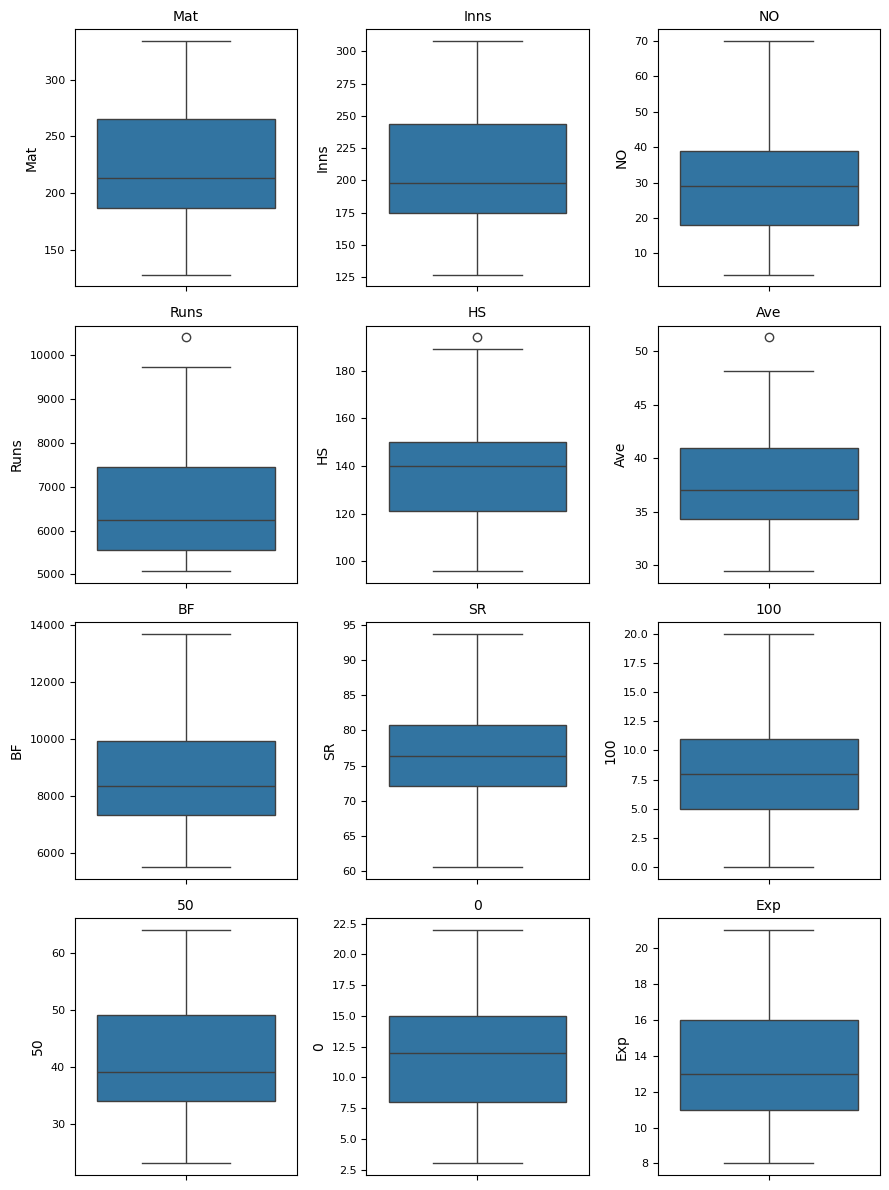

In [12]:
plt.rc('font', size=10) 
plt.rc('axes', titlesize=10) 
plt.rc('axes', labelsize=10) 
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 


numeric_cols = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_cols)


ncols = 3 
nrows = (num_cols + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3 * ncols, 3 * nrows))
axes = axes.flatten() 

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(y=df[col], ax=ax) 
    ax.set_title(col) 

plt.tight_layout() 
plt.show()

In [16]:
df_copy=df.copy()

In [17]:
df_copy.head(2)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141,41.71,12942,75.10,15,64,15,12


In [19]:
df_copy.drop(columns='Player',inplace=True)
df_copy.head(1)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
9,299,289,32,10405,169,40.48,13086,79.51,19,63,16,17


### Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale.|
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [13]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
df_scaled=sc.fit_transform(df_copy)
df_scaled

array([[ 1.5865593 ,  1.83513966,  0.16611147,  2.60729994,  1.28071846,
         0.56871389,  2.09919921,  0.39288932,  2.27701556,  1.98007861,
         0.96062034,  1.22699509],
       [ 1.35644765,  1.46770884,  0.73995111,  2.12575702,  0.05307482,
         0.82206585,  2.02809043, -0.18320931,  1.40300959,  2.07452588,
         0.72860611, -0.47882735],
       [ 1.50288234,  1.05434917,  2.89184976,  1.96828897,  1.89454028,
         2.80150675,  0.92392904,  1.59211502,  0.31050212,  2.07452588,
        -0.89549354, -0.13766286],
       [ 2.31873275,  2.27146376,  1.74417048,  1.88533705,  0.57920781,
        -0.16456494,  1.89328002, -0.32429469, -0.34500236,  1.50784229,
        -0.6634793 ,  0.54466611],
       [ 1.77483247,  1.99589064,  0.02265156,  1.81925671,  0.22845248,
        -0.58063889,  1.28786774,  0.60451738,  0.52900361,  2.07452588,
         1.19263457,  1.90932406],
       [ 0.49875875,  0.80174049, -0.76637794,  1.49588482,  2.37682885,
         0.30712285,  

In [29]:
df_scaled=pd.DataFrame(df_scaled,columns=[df_copy.columns])
df_scaled.head(2)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,1.586559,1.835140,0.166111,2.607300,1.280718,0.568714,2.099199,0.392889,2.277016,1.980079,0.960620,1.226995
1,1.356448,1.467709,0.739951,2.125757,0.053075,0.822066,2.028090,-0.183209,1.403010,2.074526,0.728606,-0.478827


# K-Means

[K-means](http://https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

# How to Implementing K-Means Clustering ?

* Choose the number of clusters k
* Select k random points from the data as centroids
* Assign all the points to the closest cluster centroid
* Recompute the centroids of newly formed clusters
* Repeat steps 3 and 4


In [76]:
k_value=[2,3,4,5,6,7]

In [77]:
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [78]:
ssd=[]

for k in k_value:
    km=KMeans(n_clusters=k,max_iter=150,random_state=54)
    km.fit(df_scaled)
    ssd.append(km.inertia_)

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [79]:
ssd

[506.66380099518034,
 478.7939656791594,
 383.0214195069129,
 319.95017112745296,
 299.7964597576789,
 284.5765336216646]

### Finding the Optimal Number of Clusters

#### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

Text(0, 0.5, 'WCSS')

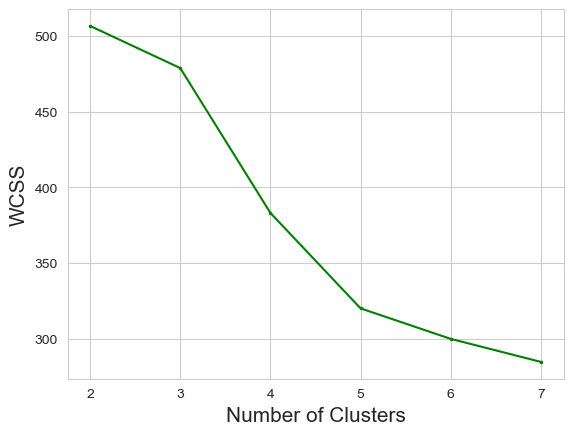

In [197]:
sns.set_style("whitegrid")
plt.plot(k_value,ssd,marker='o',markersize=1.5,color='g### Finding the Optimal Number of Clusters

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [81]:
kmodel=KMeans(n_clusters=4,max_iter=150,random_state=24)
kmodel.fit(df_scaled)

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=150, n_clusters=4, random_state=24)

In [82]:
kmodel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 2, 2, 2, 2,
       3, 0, 2, 2, 3, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 3])

In [83]:
df_copy['Cluster ID']=kmodel.labels_

In [84]:
df_copy.head(2)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster ID
9,299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,1
11,288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,1


<Axes: xlabel='Mat', ylabel='Runs'>

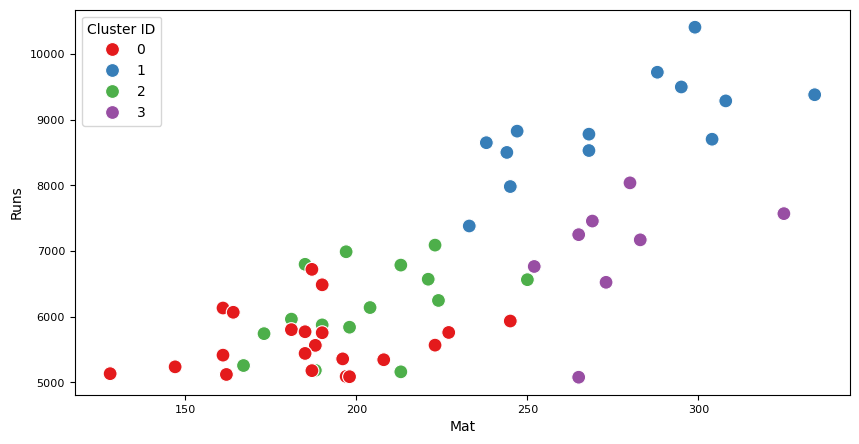

In [85]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_copy,x='Mat',y='Runs',hue='Cluster ID',palette='Set1',s=100)

<Axes: xlabel='Runs', ylabel='Ave'>

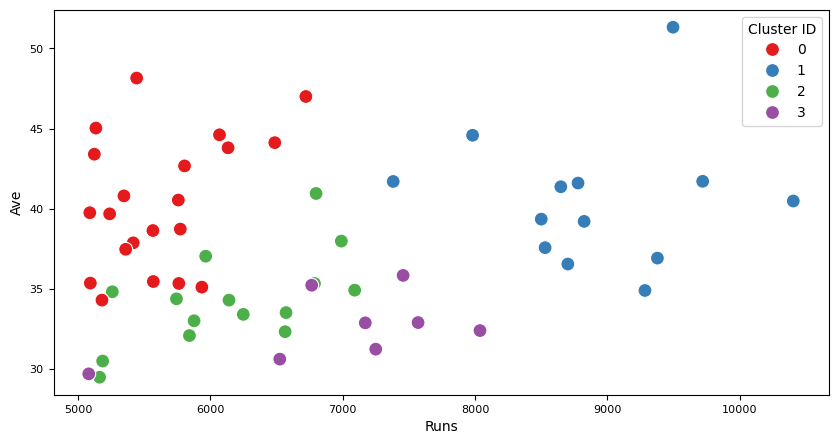

In [86]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_copy,x='Runs',y='Ave',hue='Cluster ID',palette='Set1',s=100)

> **`Davies-Bouldin Index (DBI) Score Interpretation`**

The ideal Davies-Bouldin Index (DBI) score is **0**, as this would indicate perfectly separated and cohesive clusters. However, a score of exactly 0 is very rare in real-world data. Here’s a practical guide to interpreting DBI scores:

- **`Near 0:`** Indicates highly distinct, well-separated clusters with low intra-cluster variance. This is typically seen with very well-structured datasets where clusters have minimal overlap.

- **`1 or Less:`** Generally indicates good clustering, where clusters are relatively well-separated. For many applications, scores close to 1 or slightly below are considered effective.

- **`1 to 2:`** Scores in this range are common in moderate-quality clustering, with some overlap or less compact clusters. Depending on your data and goals, this may still be acceptable but suggests room for improvement.

- **`Above 2:`** Indicates poor clustering quality, suggesting significant overlap between clusters or high within-cluster variance. You may need to revisit feature selection, try different clustering algorithms, or optimize parameters.


In [87]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin Index
score = davies_bouldin_score(df_scaled, kmodel.labels_)

In [88]:
score

1.318119755790629

In [90]:
df_copy.head(1)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster ID
9,299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,1


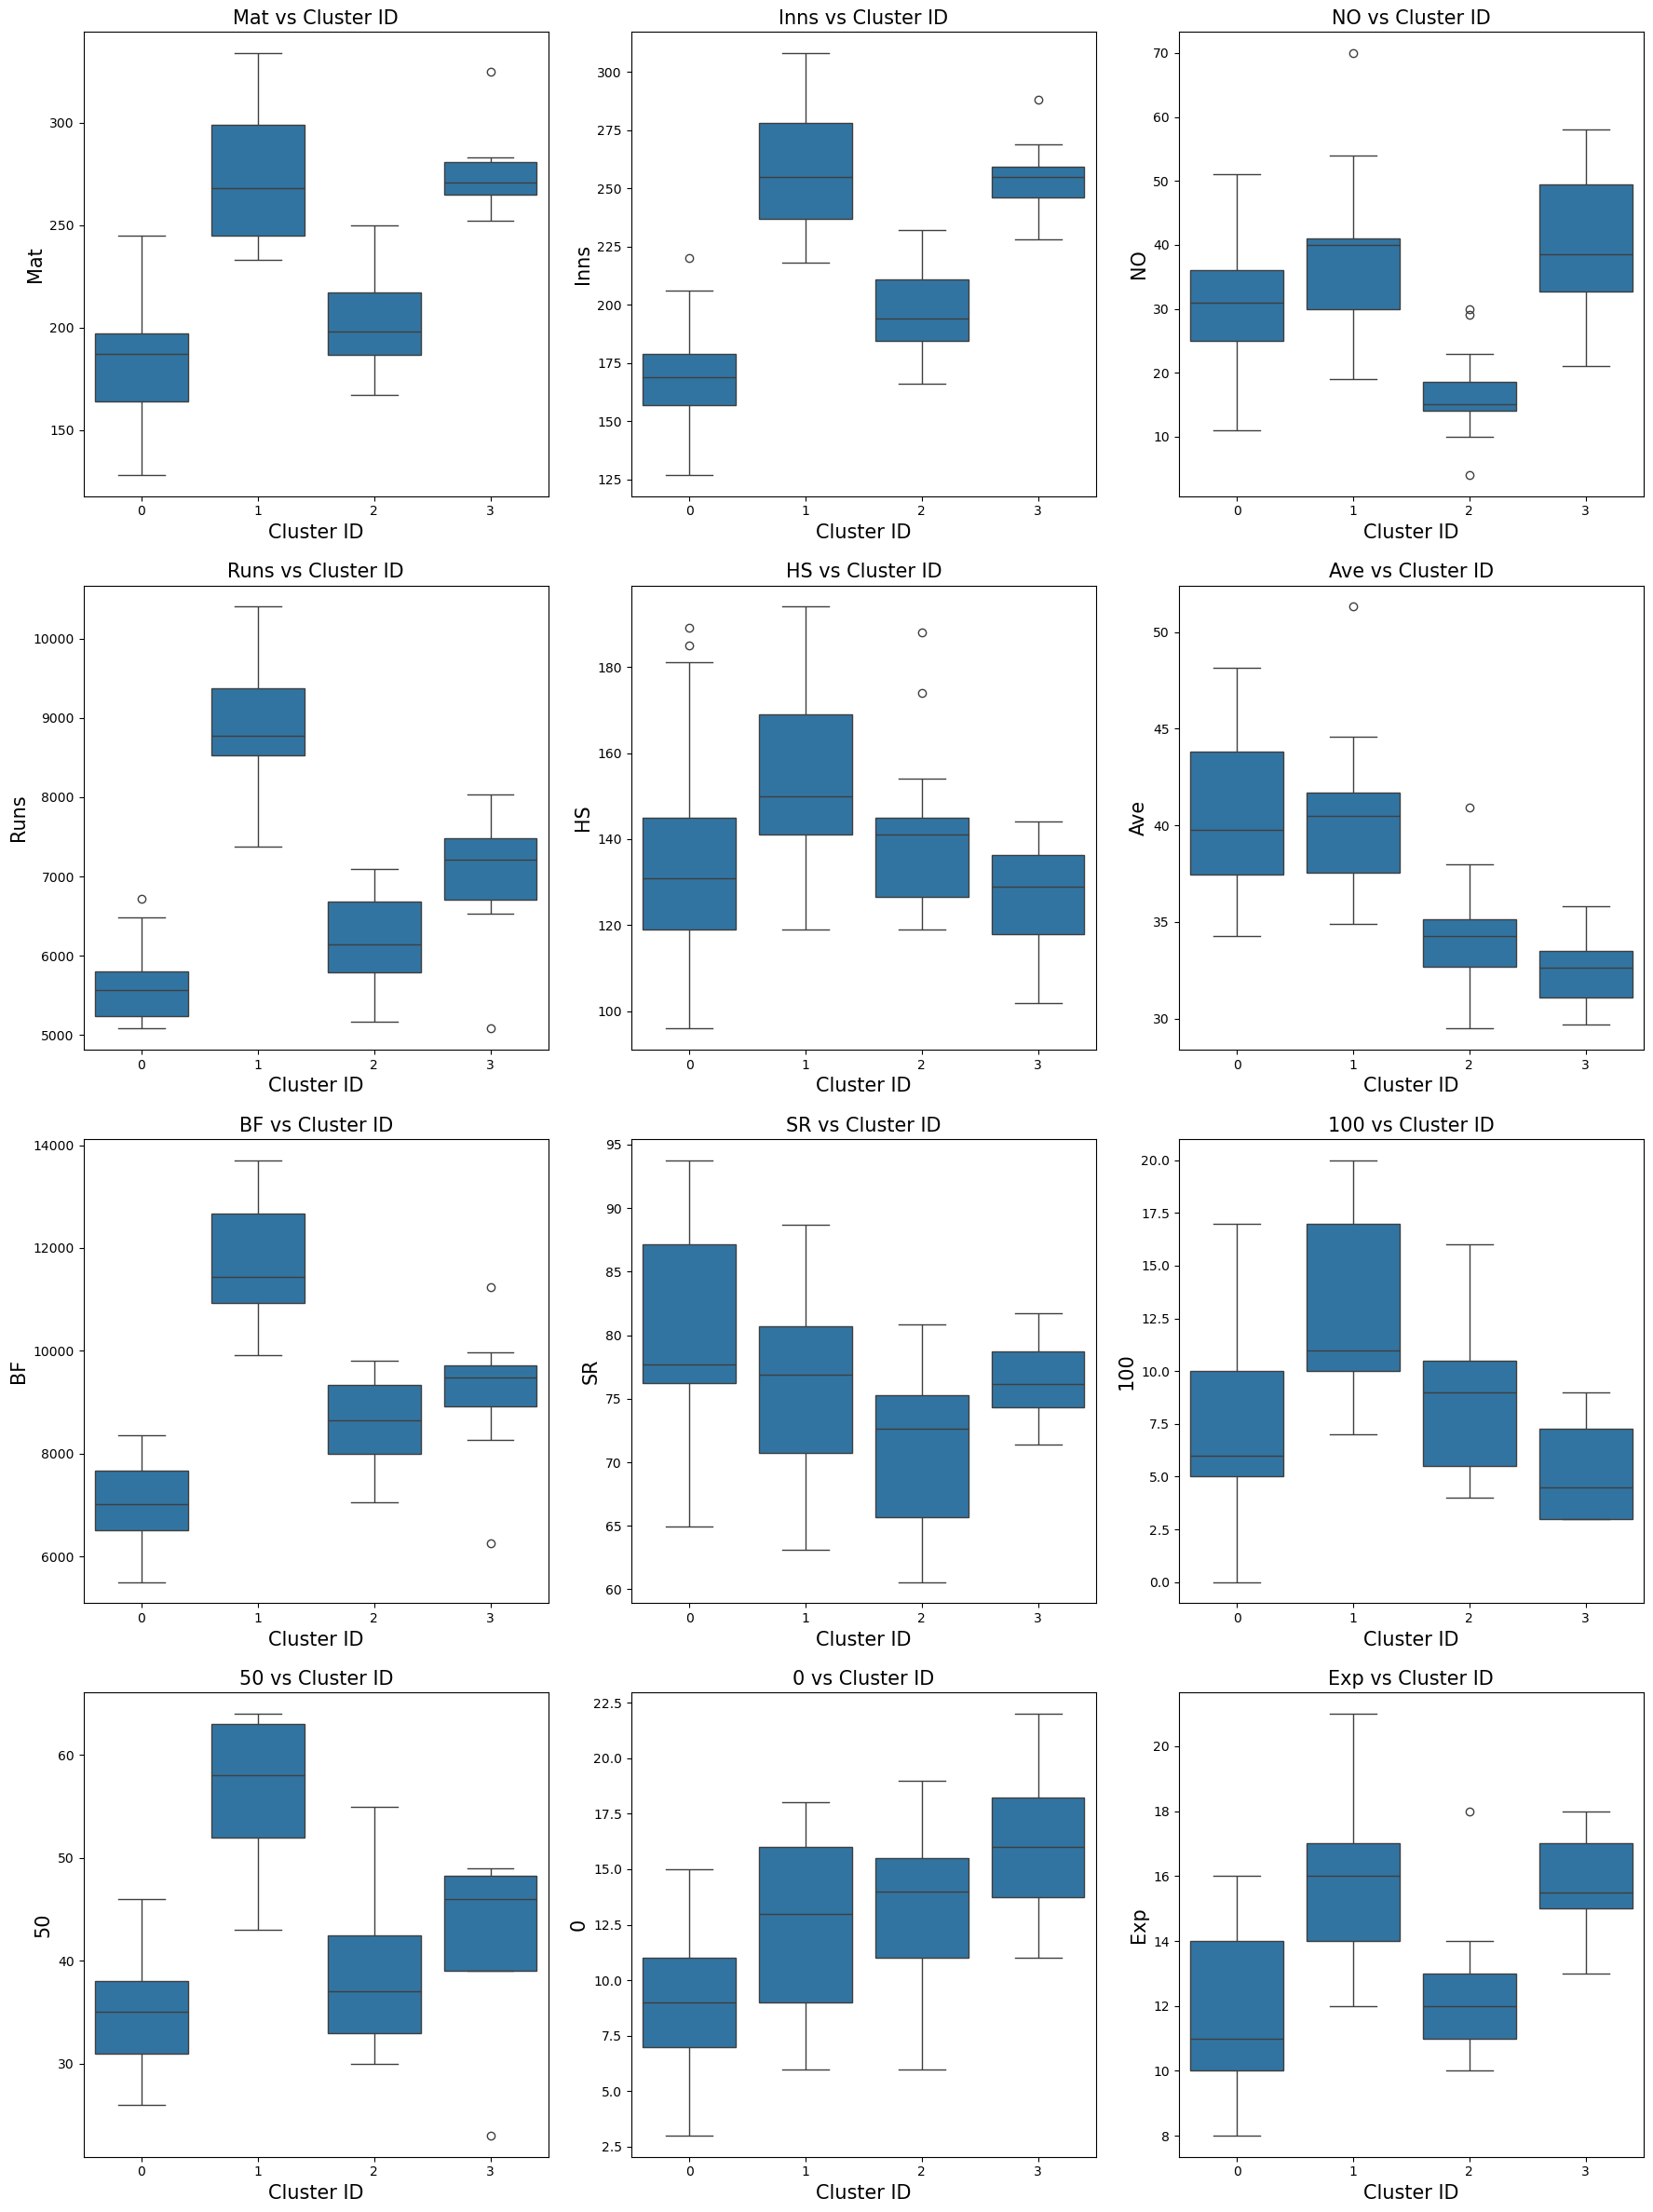

In [130]:
# Box plot to visualize Cluster Id vs runs

plt.rc('font', size=15) 
plt.rc('axes', titlesize=15) 
plt.rc('axes', labelsize=15) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 


d=['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', 'Exp']

num_cols=len(d)

ncols = 3 
nrows = (num_cols + ncols - 1) // ncols 

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=( 6* ncols, 6 * nrows))
axes = axes.flatten()

for ax,col in zip(axes,d):
    sns.boxplot(x='Cluster ID',y=df_copy[col],data=df_copy,ax=ax)
    ax.set_title(f'{col} vs Cluster ID')
    
    
plt.tight_layout()
plt.show()

In [126]:
cluster_means = df_copy.groupby('Cluster ID').mean().reset_index()

cluster_means_melted = cluster_means.melt(id_vars='Cluster ID', var_name='Metric', value_name='Mean Value')


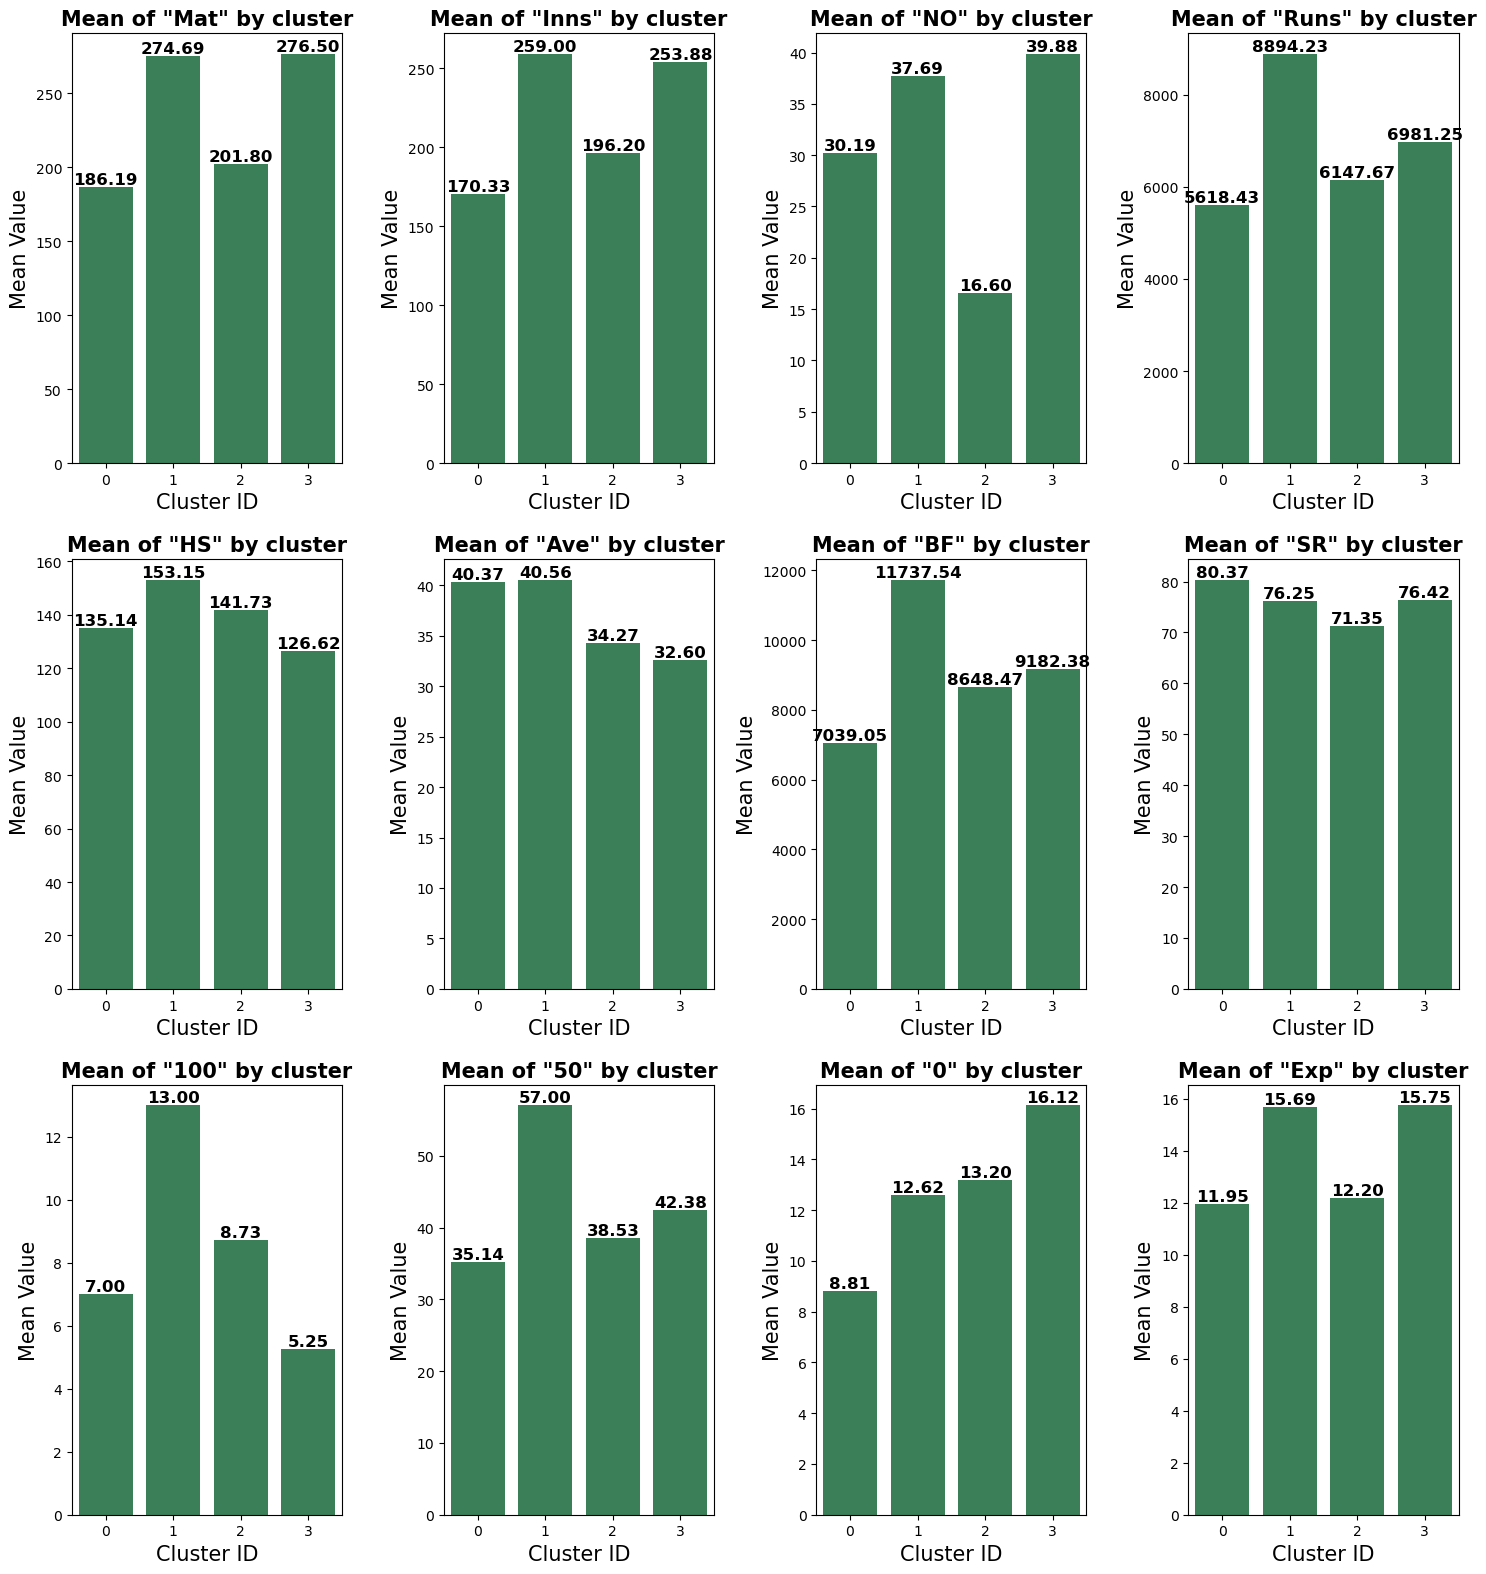

In [191]:
# Filter the melted DataFrame for the 'Mat' metric only

plt.rc('font', size=15) 
plt.rc('axes', titlesize=15) 
plt.rc('axes', labelsize=15) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 


metrics=cluster_means_melted['Metric'].unique()

num_cols=len(metrics)
ncols=4

nrows = (num_cols + ncols - 1) // ncols 

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,4*ncols))
axes = axes.flatten() 

for ax,metric in enumerate(metrics):
    metric_data=cluster_means_melted[cluster_means_melted['Metric']==metric]
    sns.barplot(x='Cluster ID',y='Mean Value',data=metric_data,ax=axes[ax],color='seagreen')
    axes[ax].set_title(f'Mean of "{metric}" by cluster',fontweight='bold')
    for container in axes[ax].containers:
        axes[ax].bar_label(container, labels=[f'{v.get_height():.2f}' for v in container],
                                              fontsize= 12, fontweight='bold', color ='black')


plt.tight_layout()


<a id="5"></a> <br>
### Final Analysis